### <b>**Regression** </b>

### **Agenda**

In this lesson, we will cover the following concepts with the help of a business use case:
* Use Case: Regression
* Regression Algorithms
* Types of Model Evaluation Metrics
* Gradient Descent
* Types of Gradient Descents
* Use Case: Stochastic Gradient Descent (SGD)


### **Use Case: Regression**

Note: At first, with the help of a use case, we are going to perform all the basic steps to reach the model training and predicition part.
  

#### <b> **Problem Statement:** </b>

Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

#### <b> **Analysis to be done:** </b>

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

#### <b>**Dataset**</b>

Google Play Store data (**googleplaystore.csv**)

Link: https://www.dropbox.com/sh/i06ohrau3ucfgbm/AACeYXumL56543KnDNQFlj8ma?dl=0


#### <b> **Data Dictionary:**</b>

|Variables|Description|
|:-|:-|
|App| Application name|
|Category|Category to which the app belongs|
|Rating|Overall user rating of the app|
|Reviews|Number of user reviews for the app|
|Size|Size of the app|
|Installs|Number of user downloads/installs for the app|
|Type|Paid or Free|
|Price|Price of the app|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category)<br>For example, a musical family game will belong to Music, Game, Family genres|
|Last Updated|Date when the app was last updated on Play Store|
|Current Ver|Current version of the app available on Play Store|
|Android Ver|Minimum required Android version|

#### <b> **Solution:**</b>

#### <b> **Import Libraries**</b>

In [521]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### <b> **Import and Check Dataset**</b>

In [522]:
inp0 = pd.read_csv("../ML Dataset/Lesson 3/googleplaystore.csv")

In [523]:
# Check first five rows
inp0.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up


#### <b> Observations </b>
The data will be displayed on the screen.

In [524]:
#Check number of columns and rows, and data types
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### <b> **Check Data Types**</b>

In [525]:
#checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### <b> **Finding and Treating Null Values**</b>

In [526]:
#Finding count of null values
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [527]:
#Dropping the records with null ratings
#This is done because ratings is our target variable
inp0.dropna(how ='any', inplace = True)

In [528]:
inp0.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### <b> Handling the Variables </b>

**1. Clean the price column**

In [529]:
#Cleaning the price column
inp0.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

#### <b> Observations </b>
Some have dollars, some have 0
* We need to conditionally handle this.
* First, let's modify the column to take 0 if value is 0, else take the first letter onwards.

In [530]:
#Modifying the column
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

**The other columns with numeric data are:<br>**
1. Reviews
2. Installs
3. Size

**2. Convert reviews to numeric**

In [531]:
#Converting reviews to numeric
inp0.Reviews = inp0.Reviews.astype("int32")

In [532]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**3. Handle the installs column**

In [533]:
#Handling the installs column
inp0.Installs.value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

We'll need to remove the commas and the plus signs.

<b> Defining function for the same </b>

In [534]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [535]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [536]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

**4. Handle the app size field**

In [537]:
#Handling the app size field
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [538]:
inp0["Size"] = inp0["Size"].map(change_size)

In [539]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [540]:
#Filling Size which had NA
inp0.Size.fillna(method = 'ffill', inplace = True)

In [541]:
#Checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### **Sanity checks**

1. Average rating should be between 1 and 5, as only these values are allowed on Play Store. Drop any rows that have a value outside this range.

In [542]:
#Checking the rating
inp0.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### <b> Observations </b>

Min is 1 and max is 5. None of the values have rating outside the range.

2. Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [543]:
#Checking and counting the rows
len(inp0[inp0.Reviews > inp0.Installs])

7

In [544]:
inp0[inp0.Reviews > inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [545]:
inp0 = inp0[inp0.Reviews <= inp0.Installs].copy()

In [546]:
inp0.shape

(9353, 13)

3. For free apps **(Type == “Free”)**, the price should not be **> 0**. Drop any such rows.

In [547]:
len(inp0[(inp0.Type == "Free") & (inp0.Price>0)])

0

#### **EDA**

#### <b> Box Plot: Price</b>

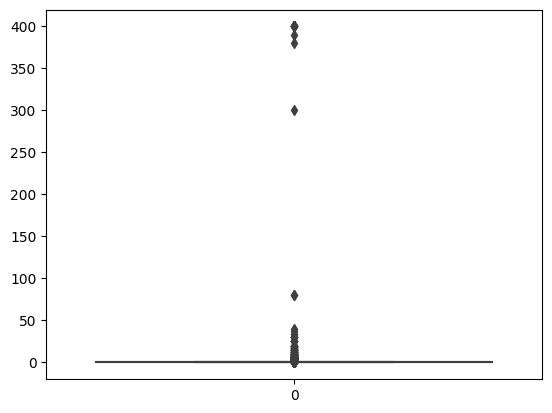

In [548]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Price)
plt.show()

#### <b> Box Plot: Reviews</b>

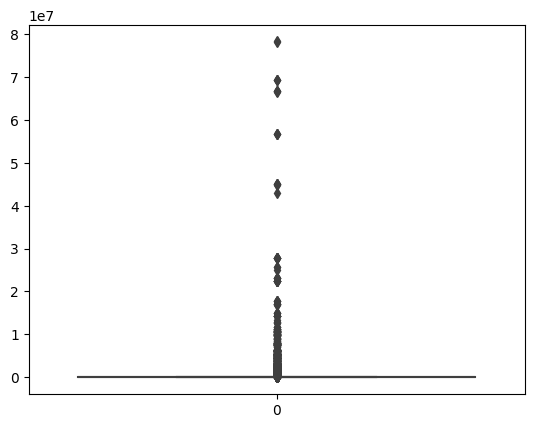

In [549]:
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(inp0.Reviews)
plt.show()

#### **Checking Distribution and Skewness:**

How are the ratings distributed? Is it more toward higher ratings?

##### **Distribution of Ratings**

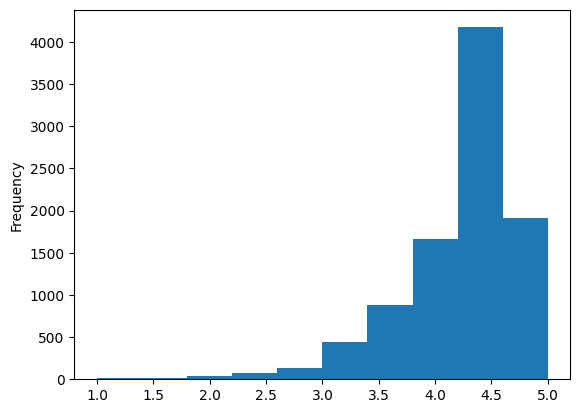

In [550]:
#Distributing the ratings
inp0.Rating.plot.hist()
#Show plot
plt.show()

##### **Histogram: Size**

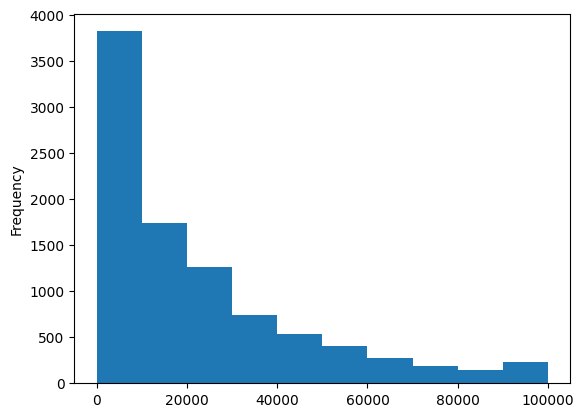

In [551]:
inp0['Size'].plot.hist()
#Show plot
plt.show()

#### <b> Observations </b>
A histogram is plotted with ratings on the x-axis and frequency on the y-axis, and the ratings are distributed.

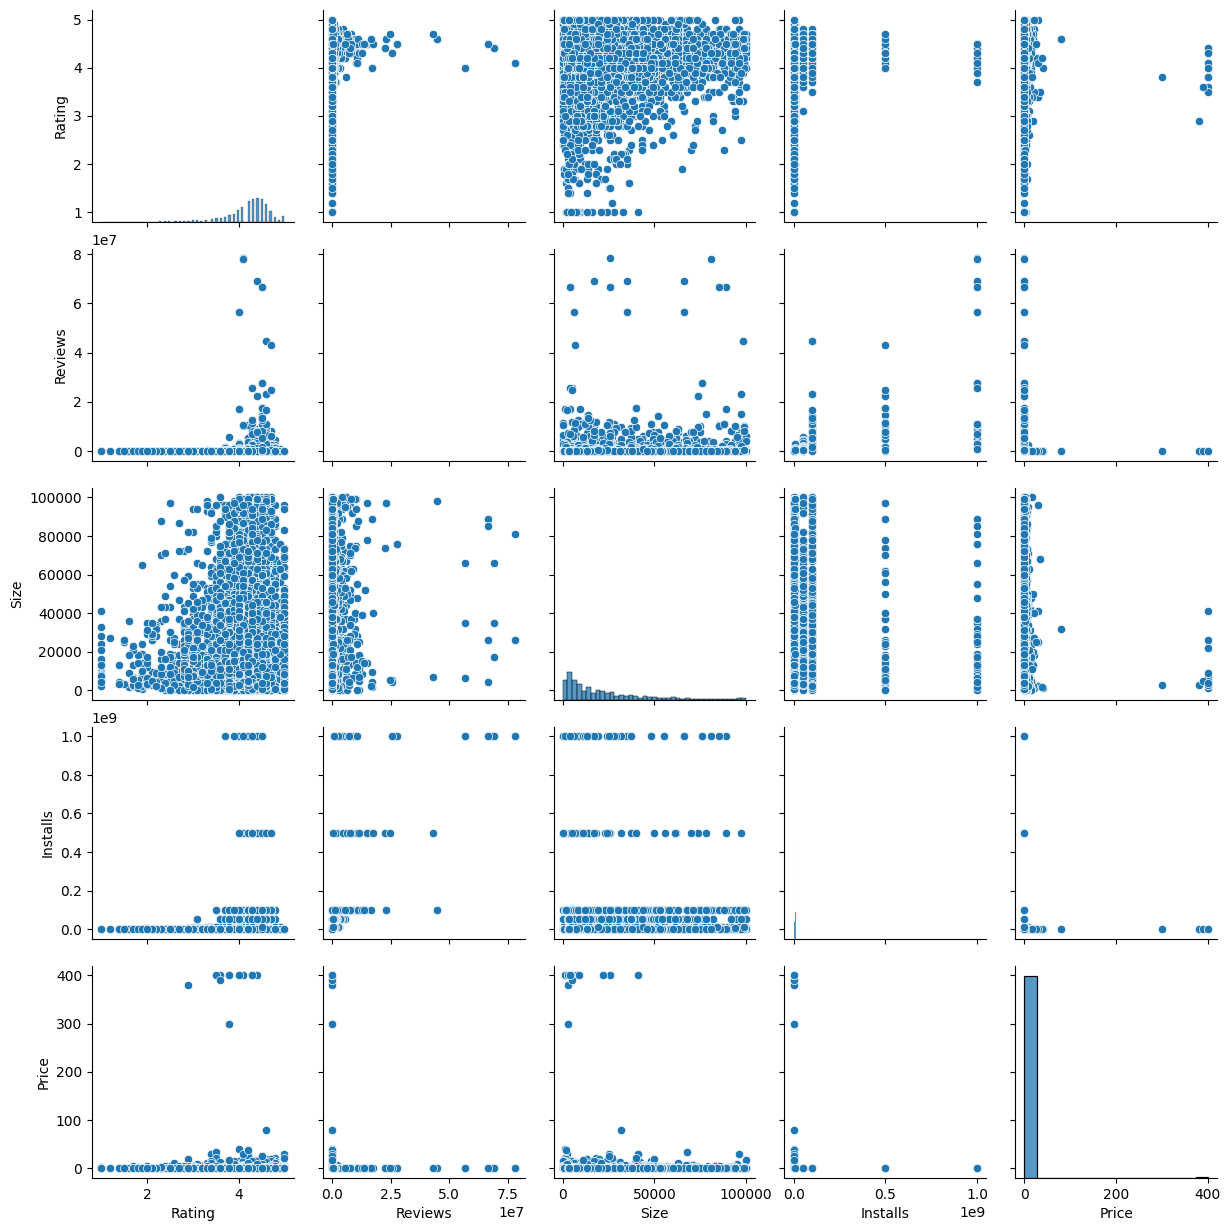

In [552]:
#Pair plot
sns.pairplot(data=inp0)

##### **Outlier Treatment:**


##### **1. Price:** 

From the box plot, it seems like there are some apps with very high prices. A price of $200 for an application on the Play Store is very high and suspicious.
Check the records that have very high price:
Is 200 a high price?

In [553]:
#Checking the records
len(inp0[inp0.Price > 200])

15

In [554]:
inp0[inp0.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [555]:
inp0 = inp0[inp0.Price <= 200].copy()

inp0.shape

(9338, 13)

##### **2. Reviews:**

Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [556]:
#Dropping the records with more than 2 million reviews
inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape

(8885, 13)

##### **3. Installs:**

There seem to be some outliers in this field too. Apps having a very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

Decide a threshold as the cutoff for outliers and drop records having values more than the threshold.




In [557]:
#Dropping the apps that have a very high number of installs
inp0.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

#### <b> Observations </b>

Looks like there are just 1% of apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [558]:
#Dropping the apps with more than 100M installs
len(inp0[inp0.Installs >= 1000000000])

6

In [559]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

(8879, 13)

In [560]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

#### **Bi-variate Analysis:**

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relationhips between rating and the other features.

##### **1.	Make scatter plot/join plot for Rating vs. Price**

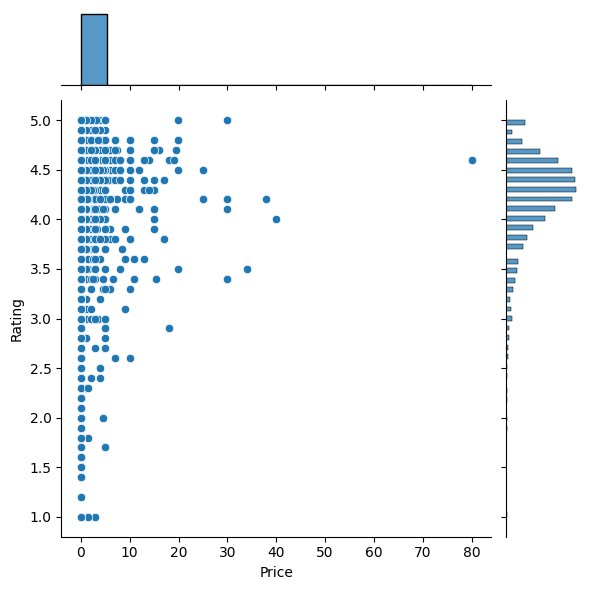

In [561]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(x=inp0.Price, y=inp0.Rating)

##### **2.	Make scatter plot/joinplot for Rating vs Size**

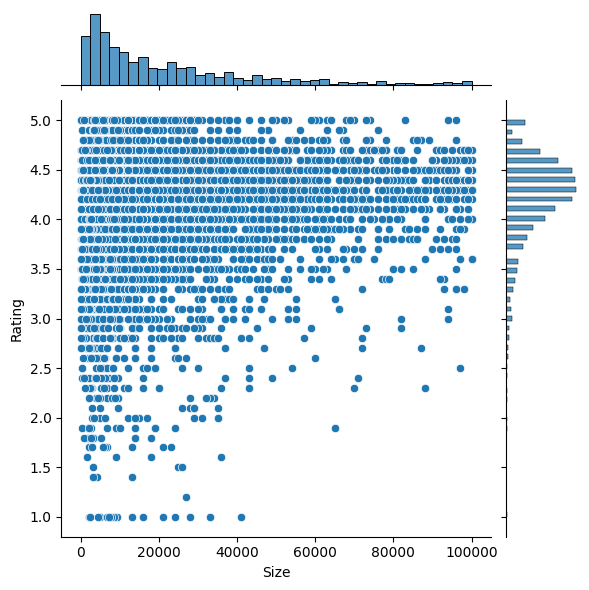

In [562]:
#Are heavier apps rated better?
sns.jointplot(x=inp0.Size, y=inp0.Rating)

##### **3.	Make scatter plot/joinplot for Rating vs Reviews**

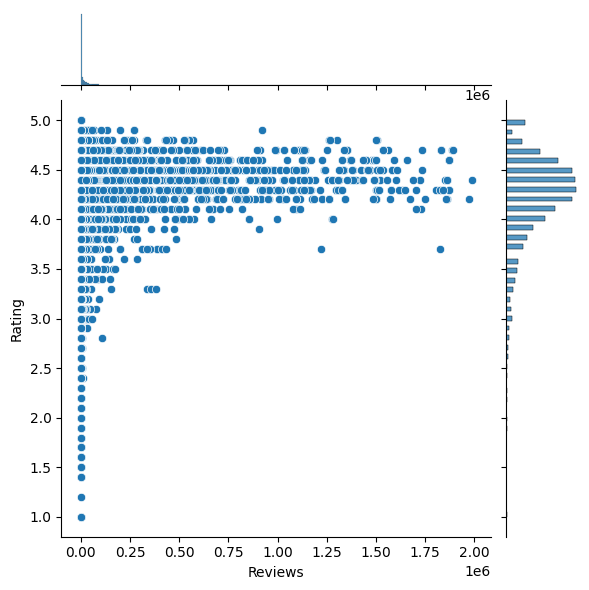

In [563]:
# Does more review mean a better rating always?
sns.jointplot(x=inp0.Reviews, y=inp0.Rating)

##### **4.	Make boxplot for Rating vs Content Rating**

<Axes: xlabel='Content_Rating', ylabel='Rating'>

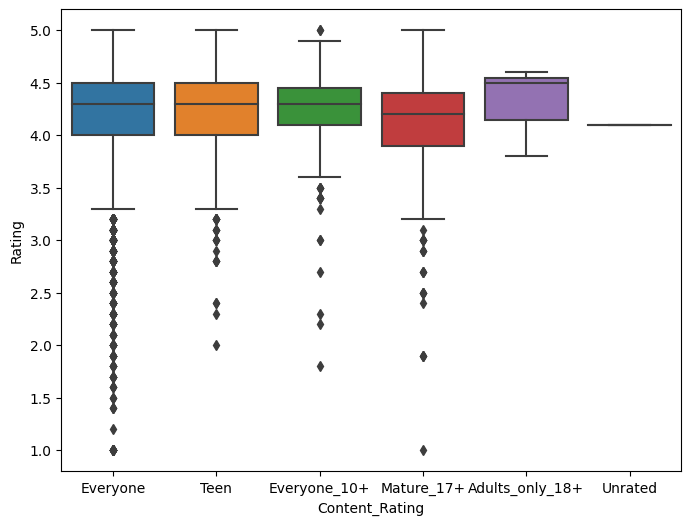

In [564]:
#Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize=[8,6])
sns.boxplot(x=inp0['Content_Rating'], y=inp0.Rating)

##### **5. Make boxplot for Ratings vs. Category**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

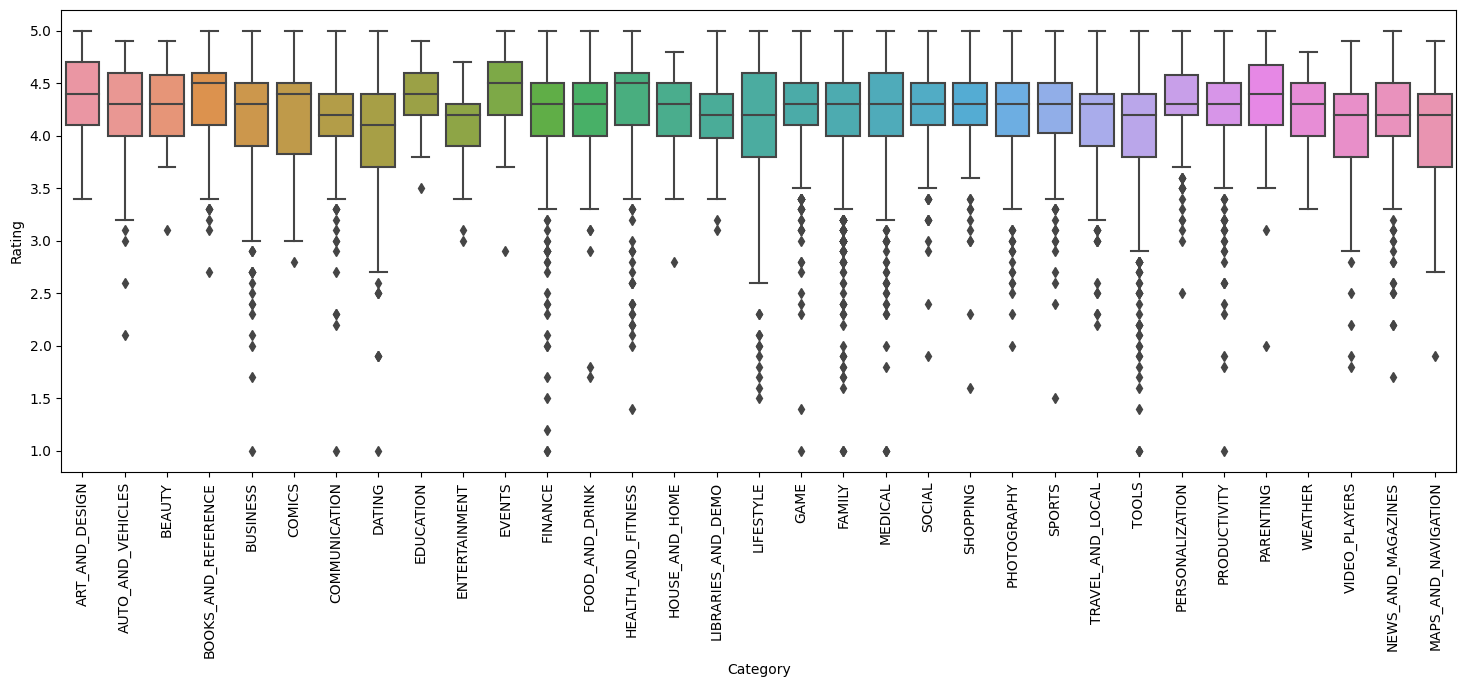

In [565]:
#Which genre has the best ratings?
plt.figure(figsize=[18,6])
g = sns.boxplot(x=inp0.Category,y= inp0.Rating)
plt.xticks(rotation=90)

#### **Pre-processing the Dataset**

##### **1. Make a copy of the dataset**

In [566]:
#Making a copy
inp1 = inp0.copy()

##### **2. Apply log transformation (np.log1p) to Reviews and Installs**

Reviews and Installs have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew.

In [567]:
#Reducing the skew
inp0.Installs.describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [568]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [569]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

##### **3. Drop columns App, Last Updated, Current Ver, and Android Ver**

 These variables are not useful for our task.

In [570]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [571]:
#Dropping the variables that are not useful for our task
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(8879, 9)

##### **4. Dummy Columns:**


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric fields. Name of the dataframe should be **inp2**.

In [572]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [573]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [574]:
inp2.shape

(8879, 157)

#### **Train-test split**

Let us distribute the data into **training** and **test** datasets using the **train_test_split()** function.

In [575]:
from sklearn.model_selection import train_test_split


In [576]:
#?train_test_split

In [577]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [578]:
df_train.shape, df_test.shape

((6215, 157), (2664, 157))

Let us separate the dataframes into **X_train, y_train, X_test, y_test.**

In [579]:
y_train = df_train.pop("Rating")
X_train = df_train

In [580]:
X_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1279,7.63627,6900.0,11.512935,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [581]:
y_test = df_test.pop("Rating")
X_test = df_test

In [582]:
X_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1161,9.329456,24000.0,13.815512,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### <b> **Regression Algorithms:**</b>

Note: Let us take a look at the theory part before moving on to the training and prediction.

#### <b>Types of Regression Algorithms:</b>

* Linear regression
* Multiple linear regression
* Polynomial regression
* Ridge regression
* Lasso regression
* ElasticNet regression

#### **When to use regression?**

If target variable is a continuous numeric variable (100–2000), then use a regression algorithm.<br><br>

![Use of Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Use%20of%20Reg.JPG)

<br><br>
Note: Let us take a look at the basics of linear regression and then move on to the model builiding part where we are going to use all the concepts that we saw in previous sessions.

#### **1. Linear Regression:**

Linear Regression is a statistical model used to predict the relationship between independent and dependent variables denoted by x and y respectively.


![Lin Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Lin%20Reg.JPG)

#### **2. Muliple Linear Regression:**

Multiple linear regression is a statistical technique used to predict the outcome of a response variable through several explanatory variables and model the relationships between them.

![Multiple LR](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Multiple%20LR.JPG)

#### **3. Polynomial Regression:**

Polynomial regression is applied when data is not formed in a straight line. 
It is used to fit a linear model to non-linear data by creating new features from powers of non-linear features.

Example: Quadratic features 


![Pol Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Pol%20Reg.JPG)

### <b> Types of Model Evaluation Metrics:</b>

#### **Assumption** <br>

Let us consider the following:

$y_i$ – the observed value

$\bar{y}$ – the mean value of a sample

$\hat{y}_i$ – the value estimated by the regression line


#### **Sum of Squares Total (SST)** <br>

  The squared variations between the measured dependent variable and its mean are referred to as the **Sum of Squares Total (SST)** or **Total Sum of Squares (TSS)**.

  It's similar to the variation of descriptive statistics in that it's the dispersion of measured variables around the mean.

  It is a measure of the dataset's overall variability.

  $$
  SST = SSR + SSE = \sum_{i=1}^{n}(\hat{y}_i - \bar{y}_i)^2 + \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
  $$

  ![SST](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/SST.png)

<br/>

#### **Sum of Squares due to Regression (SSR)** <br>

  The difference between the predicted value and the dependent variable's mean are referred to as the **Sum of Squares due to Regression (SSR)** or **Explained Sum of Squares (ESS)**.

  It can be considered as a metric for describing how well our line fits the data.

  If the SSR (or ESS) is equal to the SST (or TSS), the regression model is flawless and captures all observed variability.

  $$
  SSR = \sum_{i=1}^{n}(y_i - \bar{y})^2
  $$

  ![SSR](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/SSR.png)

<br/>

#### **Sum of Squares Error (SSE)** <br>

  The difference between the observed and predicted values are referred to as the **Sum of Squares Error (SSE)** or **Residual Sum of Squares (RSS)**, where `residual` stands for `remaining` or `unexplained`.

  This error must be reduced since the smaller it is, the better the regression's estimation power.

  $$
  SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
  $$

  $$
  Or
  $$

  $$
  SSE = \sum_{i=1}^{n}e_i^2
  $$

  $$
  where,
  $$
  
  $$
  e_i = (y_i - \hat{y}_i)
  $$

  ![SSE](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/SSE.png)

<br/>

#### **Relation Among SST, SSR, and SSE** <br>

  Since certain people use these abbreviations in various ways, it can be very confusing.

  We use one of two sets of notations for these abbreviations: SST, SSR, and SSE or TSS, ESS, and RSS.

  These equations are related in the following ways:

  $$
  SST = SSR + SSE
  $$

  $$Or$$

  $$
  TSS = ESS + RSS
  $$

  This is because the overall variability of the dataset is equivalent to the variability described by the regression line and the unknown variability (also known as error).

  For a constant total variability, a lower error would result in a better regression. A higher error, on the other hand, would result in a weaker regression. This should always be remembered regardless of the notation set used.

  ![Connection](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Connection.png)

<br/>

#### **R-Square Matrix** <br>

  The determination coefficient also known as **R2 (R-squared) score** is used for the performance evaluation of a linear regression model.

  R2 displays the proportion of data points inside the regression equation line.

  A higher R2 value means improved results.

  It is calculated as follows:

  $$
  R^2 = 1 - \frac{SSE}{SSR}
  $$

  $$
  Or
  $$

  $$
  R^2 = 1 - \frac{RSS}{ESS}
  $$

  The highest possible score is 1, which is achieved when the predicted and actual values are the same.

  The R2 score is 0 for a baseline model.

  In the worst-case scenario, the R2 score can also be negative.

<br/>


#### **Import *statsmodels* Library for Linear Regression**

In [583]:
#Importing the statsmodel library
import statsmodels.api as sm

In [584]:
#Applying linear regression
model1 = sm.OLS(y_train, X_train.astype(float))

In [585]:
model1 = model1.fit()

In [586]:
#Finding the summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3717.
Date:                Sun, 28 May 2023   Prob (F-statistic):                        0.00
Time:                        04:03:06   Log-Likelihood:                         -4281.7
No. Observations:                6215   AIC:                                      8811.
Df Residuals:                    6091   BIC:                                      9646.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1752      0.006     28.037      0.000       0.163       0.187
Size                                         -2.896e-07   3.37e-07     -0.859      0.391   -9.51e-07    3.72e-07
Installs                                        -0.1499      0.006    -24.184      0.000      -0.162      -0.138
Price                                            0.0006      0.003      0.177      0.860      -0.006       0.007
Category_AUTO_AND_VEHICLES                       1.6381      0.125     13.136      0.000       1.394       1.883
Category_BEAUTY                                  1.7213      0.128     13.462      0.000       1.471       1.972
Category_BOOKS_AND_REFERENCE                     1.6843      0.122     13.826      0.000       1.445       1.923
Category_BUSINESS                                1.6046      0.121     13.272      0.000       1.368       1.842
Category_COMICS                                  2.3786      0.226     10.517      0.000       1.935       2.822
Category_COMMUNICATION                           1.5478      0.121     12.765      0.000       1.310       1.786
Category_DATING                                  1.5013      0.122     12.262      0.000       1.261       1.741
Category_EDUCATION                               2.8642      0.251     11.419      0.000       2.373       3.356
Category_ENTERTAINMENT                           2.7757      0.251     11.065      0.000       2.284       3.267
Category_EVENTS                                  1.7447      0.126     13.792      0.000       1.497       1.993
Category_FAMILY                                  2.8988      0.243     11.920      0.000       2.422       3.376
Category_FINANCE                                 1.5685      0.121     12.976      0.000       1.332       1.806
Category_FOOD_AND_DRINK                          1.5993      0.123     13.006      0.000       1.358       1.840
Category_GAME                                    3.1390      0.241     13.046      0.000       2.667       3.611
Category_HEALTH_AND_FITNESS                      1.6296      0.121     13.464      0.000       1.392       1.867
Category_HOUSE_AND_HOME                          1.6151      0.124     13.002      0.000       1.372       1.859
Category_LIBRARIES_AND_DEMO                      1.6541      0.125     13.247      0.000       1.409       1.899
Category_LIFESTYLE                               1.5913      0.121     13.156      0.000       1.354       1.828
Category_MAPS_AND_NAVIGATION                     1.5212      0.123     12.399      0.000       1.281       1.762
Category_MEDICAL                              

#### **Identified values for *model1*:**

* **$R^2$ (uncentered): 0.987**

  **Overview of $R^2$ (R-square):**
  ![R-square](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/R-square.JPG)

* **Adjusted $R^2$ (uncentered): 0.987**

  **Overview of adjusted $R^2$:**

  The disadvantage with R-squared is that it assumes every independent variable in the model and explains variations in the dependent variable.
Use adjusted R-squared when working on a multiple linear regression problem.

  ![Adj R-square](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Adj%20R-square.JPG)


* **F-statistic: 3717**
  
  **Overview of F-statistic:**

  The F-test indicates whether the linear regression model provides a better fit to the data in comparison to a model that contains no independent variables.
  
    Note: In general, the models with high F-statistic are considered as optimum.

  An F-test provides 2 values:
  * F-critical: This value is also called as F statistic
  * F-value: This value is without the “critical” part
  
    Note: The F-value is always observed along with the p-value. In general, the higher the F-value of a variable, the lesser the p-value.


* **AIC: 8811**

* **BIC: 9646**

  **Overview of AIC and BIC:**

  * AIC and BIC are penalized-likelihood criteria.

  * They are used for selecting the best predictor subsets in regression and comparing the nonnested models.

  * AIC: "It is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model." 

  * BIC: "It is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup."


    Source: https://www.methodology.psu.edu/resources/AIC-vs-BIC/



* **Formula:**

  The AIC or BIC for a model is usually written in the form:
  
  **$[-2logL + kp]$**
  
  Where: 
    * L = likelihood function
    * p = number of parameters in the model
    * k = 2 for AIC and log(n) for BIC


* In popular opinion:
  * Lower AIC tells that the model is closer to the truth
  * Lower BIC tells that the model is more likely to be the true model

#### **Prediction and evaluation using "model1"**

In [587]:
#Prediction and evaluation
import sklearn.metrics as metrics
y_test_pred= model1.predict(X_test)

**Metrics used for regression models:**
<br><br>

![RMSE1](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/RMSE1.JPG)


Lower values of RMSE indicate better fit.

In [588]:
#Assessing the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

#RMSE of "model1" = 0.49203326281981113

0.4920332628199504


#### **MPE:**

Mean Percentage Error measures the errors that indicate whether or not the prediction is biased. 

Bias is one component of the mean squared error and is measured as the variance of the errors plus the square of the mean error. 

$$MSE = VAR(E) + (MPE)^2$$

Therefore, minimizing the MSE will implicitly minimize the bias and the variance of the errors.


MPE is the computed average of percentage errors by which prediction of a model differ from actual values of the quantity being predicted.

Formula:

$$MPE=\ \frac{100\%}{n}\ \sum^{n}_{i=1}\ \frac{a_i - p_i}{a_i}$$


Where:
* $a_i$ = Actual value of the quantity being predicted
* $p_i$ = Predicted value
* $n$ = Number of different times for which the variable is predicted

In [589]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: -2.5730378350652585


#### **MAPE:**

Mean Absolute Percentage Error measures the prediction accuracy of a model.

Formula:

$$MAPE\ =\ \frac{1}{n}\ \sum^{n}_{i=1}\ \frac{|A_i-P_i|}{|A_i|}$$

Where:
* $A_i$ = Actual value of the quantity being predicted
* $P_i$ = Predicted value
* $n$ = Number of different times for which the variable is predicted


<br><br>
Mean Absolute Percentage Error is similar to Mean Absolute Error but is normalized by true observation.

The mean absolute percentage error is useful for reporting purpose and is expressed in generic percentage terms.

<br><br>
Note: In general, the desirable MAPE value is less than 20.


In [590]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 9.490934337927417


#### **Reiterating the Model**

**1. Feature selection using p-value:**

In regression analysis, p-values and coefficients together indicate which relationships in the model are statistically significant and the nature of those relationships.


Coefficients describe the mathematical relationship between each independent variable and the dependent variable.

p-values for the coefficients indicate whether these relationships are statistically significant.


In general, the threshold for the p-value is taken as $\leq$ 0.05.


Let's find the variable with value $\leq$ 0.05.

**2. List:**

Identified 99 variables that have p-value $\leq$ 0.05.

'Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY','Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS','Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION','Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE','Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS','Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE','Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES','Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY','Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL','Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone','Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated','Genres_Art_&_Design','Genres_Art_&_Design;Creativity','Genres_Art_&_Design;Pretend_Play','Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board;Brain_Games','Genres_Books_&_Reference','Genres_Business','Genres_Casual','Genres_Casual;Action_&_Adventure','Genres_Casual;Brain_Games','Genres_Casual;Pretend_Play','Genres_Comics','Genres_Comics;Creativity','Genres_Communication','Genres_Dating','Genres_Education','Genres_Education;Action_&_Adventure','Genres_Education;Creativity','Genres_Education;Education','Genres_Education;Pretend_Play','Genres_Educational;Education','Genres_Educational;Pretend_Play','Genres_Entertainment','Genres_Entertainment;Brain_Games','Genres_Entertainment;Creativity','Genres_Entertainment;Music_&_Video','Genres_Events','Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home','Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical','Genres_Music;Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting;Education','Genres_Parenting;Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity','Genres_Puzzle','Genres_Puzzle;Brain_Games','Genres_Racing;Action_&_Adventure','Genres_Role_Playing','Genres_Shopping','Genres_Simulation','Genres_Simulation;Action_&_Adventure','Genres_Social','Genres_Strategy','Genres_Tools','Genres_Tools;Education','Genres_Travel_&_Local','Genres_Travel_&_Local;Action_&_Adventure','Genres_Weather'

**3. Create a new dataset with chosen variables and split it into training and testing dataset**

In [591]:
#Create inp3
inp3 = inp2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY',
             'Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS',
             'Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION',
             'Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE',
             'Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS',
             'Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE',
             'Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES',
             'Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY',
             'Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL',
             'Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone',
             'Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated',
             'Genres_Art_&_Design','Genres_Art_&_Design_Creativity','Genres_Art_&_Design_Pretend_Play',
             'Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board_Brain_Games','Genres_Books_&_Reference',
             'Genres_Business','Genres_Casual','Genres_Casual_Action_&_Adventure','Genres_Casual_Brain_Games',
             'Genres_Casual_Pretend_Play','Genres_Comics','Genres_Comics_Creativity','Genres_Communication',
             'Genres_Dating','Genres_Education','Genres_Education_Action_&_Adventure','Genres_Education_Creativity',
             'Genres_Education_Education','Genres_Education_Pretend_Play','Genres_Educational_Education',
             'Genres_Educational_Pretend_Play','Genres_Entertainment','Genres_Entertainment_Brain_Games',
             'Genres_Entertainment_Creativity','Genres_Entertainment_Music_&_Video','Genres_Events',
             'Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home',
             'Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical',
             'Genres_Music_Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting_Education',
             'Genres_Parenting_Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity',
             'Genres_Puzzle','Genres_Puzzle_Brain_Games','Genres_Racing_Action_&_Adventure','Genres_Role_Playing',
             'Genres_Shopping','Genres_Simulation','Genres_Simulation_Action_&_Adventure','Genres_Social',
             'Genres_Strategy','Genres_Tools','Genres_Tools_Education','Genres_Travel_&_Local',
             'Genres_Travel_&_Local_Action_&_Adventure','Genres_Weather']]

In [592]:
#Checking datatypes
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                     bool
Category_BEAUTY                                bool
                                             ...   
Genres_Tools                                   bool
Genres_Tools_Education                         bool
Genres_Travel_&_Local                          bool
Genres_Travel_&_Local_Action_&_Adventure       bool
Genres_Weather                                 bool
Length: 100, dtype: object

In [593]:
inp3.shape

(8879, 100)

In [594]:
#split imp3
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [595]:
df_train.shape, df_test.shape

((6215, 100), (2664, 100))

**4. Separate the new dataframes into X_train, y_train, X_test, y_test**

In [596]:
#Separating the new dataframes
y_train1 = df_train.pop("Rating")
X_train1 = df_train

In [597]:
X_train1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
1279,7.63627,11.512935,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [598]:
y_test1 = df_test.pop("Rating")
X_test1 = df_test

In [599]:
X_test1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
1161,9.329456,13.815512,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**5. Create the second model**

In [600]:
#Apply linear regression
model2 = sm.OLS(y_train1, X_train1.astype(float))

In [601]:
model2 = model2.fit()

In [602]:
#Find the summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6412.
Date:                Sun, 28 May 2023   Prob (F-statistic):                        0.00
Time:                        04:03:08   Log-Likelihood:                         -4302.6
No. Observations:                6215   AIC:                                      8749.
Df Residuals:                    6143   BIC:                                      9234.
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1738      0.006     28.120      0.000       0.162       0.186
Installs                                    -0.1479      0.006    -24.049      0.000      -0.160      -0.136
Category_AUTO_AND_VEHICLES                   1.5996      0.124     12.891      0.000       1.356       1.843
Category_BEAUTY                              1.6841      0.127     13.232      0.000       1.435       1.934
Category_BOOKS_AND_REFERENCE                 1.6477      0.121     13.593      0.000       1.410       1.885
Category_BUSINESS                            1.5672      0.120     13.029      0.000       1.331       1.803
Category_COMICS                              2.3320      0.226     10.340      0.000       1.890       2.774
Category_COMMUNICATION                       1.5106      0.121     12.522      0.000       1.274       1.747
Category_DATING                              1.4687      0.122     12.045      0.000       1.230       1.708
Category_EDUCATION                           1.4881      0.124     12.048      0.000       1.246       1.730
Category_EDUCATION                           1.4881      0.124     12.048      0.000       1.246       1.730
Category_ENTERTAINMENT                       2.8894      0.247     11.696      0.000       2.405       3.374
Category_EVENTS                              1.7089      0.126     13.571      0.000       1.462       1.956
Category_FAMILY                              3.0092      0.239     12.567      0.000       2.540       3.479
Category_FINANCE                             1.5305      0.120     12.728      0.000       1.295       1.766
Category_FOOD_AND_DRINK                      1.5606      0.122     12.755      0.000       1.321       1.800
Category_GAME                                3.0847      0.239     12.904      0.000       2.616       3.553
Category_HEALTH_AND_FITNESS                  1.5906      0.120     13.211      0.000       1.355       1.827
Category_HOUSE_AND_HOME                      1.5765      0.124     12.756      0.000       1.334       1.819
Category_LIBRARIES_AND_DEMO                  1.6164      0.124     13.009      0.000       1.373       1.860
Category_LIFESTYLE                           1.5542      0.120     12.914      0.000       1.318       1.790
Category_MAPS_AND_NAVIGATION                 1.4830      0.122     12.149      0.000       1.244       1.722
Category_MEDICAL                             1.5982      0.120     13.307      0.000       1.363       1.834
Category_NEWS_AND_MAGAZINES                  1.5284      0.121     12.664      0.000       1.292       1.765
Category_PARENTING                       

* Rating	R-squared (uncentered):	0.987

* Adj. R-squared (uncentered): 0.987

* F-statistic: 6412

* AIC: 8749

* BIC: 9234

#### **How Well Does the Model Fit the Data?**
 ***model2* performs better:**


* R-squared value:<br>

  The most common way to evaluate the overall fit of a linear model is by the **R-squared** value.<br>

  R-squared is between 0 and 1 (or between 0 to 100%), and higher is better because it means that more variance is explained by the model.<br>

  In case of our models, model1 and model2 have same R-squared values.

* F-statistics:<br>

  In case of dataset that only have numerical values, it is said higher the F-statistic better the model.

  In case of our models, model2 has more F-statistic value than model1.

* AIC and BIC: <br>

  In case of models, lesser the AIC and BIC, better the model.

  In case of models, model2 has lesser AIC and BIC values than the model1.

**Prediction using "model2"**

Let us perform prediction using model2 by importing **sklearn.metrics**

In [603]:
#Importing sklearn.metrics
import sklearn.metrics as metrics
y_test_pred1= model2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))


#RMSE value of model1 = 0.49203326281981113 

0.4910204064233417


In [604]:
#Calculating MAPE
def MAPE(y_test_pred1,y_test1):
    return np.mean(np.abs((y_test1 - y_test_pred1) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred1,y_test1)) )

MAPE: 9.467552790023422


**model2** shows slight improvement as the RMSE and MAPE value of this model is lesser than that of **model1**.

#### **4. Ridge Regression:**

* Ridge Regression (L2) is used when there is a problem of multicollinearity.

* By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

<br>

![Ridge Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Ridge%20Reg.JPG)

#### **5. Lasso Regression:**

* Lasso Regression (L1) is similar to ridge, but it also performs feature selection.


* It will set the coefficient value for features that do not help in decision making very low, potentially zero.

  ![Lasso Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Lasso%20Reg.JPG)

* Lasso regression tends to exclude variables that are not required from the equation, whereas ridge tends to do better when all variables are present


#### **6. ElasticNet Regression:**

![ElasticNet Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/ElasticNet%20Reg.JPG)

#### **Use Case: Ridge, Lasso, ElasticNet Regression for Training and Prediction:**

We are going to use the same dataset that we used in the previous use case at the time of training of "model2" i.e. inp3

**1. Ridge Regression:**

In [605]:
#Importing Ridge
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001)
ridgeReg.fit(X_train1,y_train1)


Ridge(alpha=0.001)

**Evaluating using RMSE:**

In [606]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, ridgeReg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, ridgeReg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test1, y_test1)))


0.4801019580266553
0.4872360675962955
R2 Value/Coefficient of Determination: 0.13560842636666048


**2. Lasso Regression:**

In [607]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train1,y_train1)


Lasso(alpha=0.001)

**Evaluating using RMSE:**

In [608]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, lassoreg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, lassoreg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test1, y_test1)))


0.4840537621806856
0.48907170038082953
R2 Value/Coefficient of Determination: 0.12908307027714638


**3. ElasticNet Regression:**

In [609]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001)
Elastic.fit(X_train1,y_train1)


ElasticNet(alpha=0.001)

**Evaluating using RMSE:**

In [610]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, Elastic.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, Elastic.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test1, y_test1)))


0.4823869221968073
0.48770184092829333
R2 Value/Coefficient of Determination: 0.13395500615428102


### **Exercise:**

* Perform the iteration of the model with Lasso, Ridge, and ElasticNet Regression by using the original dataset i.e., **inp0** as done in the case of Linear Regression.

* Use the following metrics to evaluate the model:
  * RMSE
  * MAPE
  * R$^2$ error

#### **Cost Function:**
- A cost function is a function that evaluates a model's performance for a given dataset.

- It evaluates and expresses the error between predicted values and expected values as a single, real number.

### **Gradient:**

- A gradient is a measurement of how much a function's output varies as its inputs are changed.

### **Gradient Descent:**

- Gradient descent is an optimization algorithm that is used to find the values of the parameters (coefficients) of a function that minimizes the cost function by iteratively moving in the direction of steepest descent as determined by the gradient's negative.

- It's an optimization algorithm to discover the local minimum of a differentiable function or feature.

- We use gradient descent to update the parameters of our model. In linear regression, parameters correspond to coefficients, and in neural networks, parameters correspond to weights.

- The gradient descent equation is as follows:

![GD](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/GD.png)

### **Types of Gradient Descents:**

Gradient descents are divided into three categories, which vary primarily in the amount of data they use. These categories are:

1. Batch Gradient Descent (BGD)
2. Stochastic Gradient Descent (SGD) 
3. Mini-Batch Gradient Descent (Mini BGD)


#### **1. Batch Gradient Descent (BGD):**

- Batch gradient descent (BGD), also known as vanilla gradient descent, measures the error for each example in the training dataset, but the model is updated only after all of the training examples have been evaluated.

- This whole process is referred to as a training epoch because it resembles a loop.

- For each gradient descent iteration, it processes all the training samples. However, batch gradient descent is computationally very expensive when the number of training examples is high.

- Thus, if the number of training examples is high, we tend to use stochastic gradient descent (SGD) or mini-batch gradient descent (Mini BGD) instead.

#### **2. Stochastic Gradient Descent (SGD):**

- Stochastic gradient descent (SGD) is a form of gradient descent that processes one training example per iteration.

- It estimates the error for each example in the training dataset and updates the parameters one by one.

- Based on the problem statement, batch gradient descent (BGD) can be much faster because the parameters are modified even after an iteration in which only a single example has been processed.

- One advantage is that the frequent updates allow us to track our progress in great detail.

- However, even if the number of training examples is high, it can only process one of them, which will add to the system's overhead and the number of iterations needed.

#### **3. Mini-Batch Gradient Descent (Mini BGD):**

- Mini-batch gradient descent (Mini BGD) combines the principles of stochastic gradient descent (SGD) and batch gradient descent (BGD) and is faster than both.

- It divides the training dataset into small batches and updates each of those batches. This establishes a balance between the robustness of stochastic gradient descent (SGD) and the efficiency of batch gradient descent (BGD).

- It is compatible with both larger and smaller training examples.


### <b>Use Case: Stochastic Gradient Descent (SGD):</b>

#### <b> Importing Required Libraries </b>

In [611]:
#Importing libraries
import numpy as np
import pandas as pd

from tabulate import tabulate

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

#### <b> Load the Data</b>

In [612]:
#Load the data dictionary
diabetes = load_diabetes()

#Find the dict keys
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


#### <b> Dataset Description</b>

In [613]:
#To print the diabetes dataset description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### <b> Find Features and Target</b>

Let us split the data into **test** and **train.**

In [614]:
X = diabetes.data
Y = diabetes.target

#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### <b>Find Feature's Name</b>

In [615]:
columns = diabetes.feature_names
columns

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [616]:
diabetes_df = pd.DataFrame(diabetes.data)
diabetes_df.columns = columns
diabetes_df["MEDV"] = Y

In [617]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MEDV
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [618]:
print(diabetes_df.describe())

                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

#### <b> Standardizing Data</b>

Let us standardize the **test** and **train** data using the **StandardScaler()** function.

In [619]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [620]:
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,price
0,0.349328,1.042995,0.031679,-0.164050,-0.119997,0.236435,-1.064510,0.743624,0.429040,-0.740896,245.0
1,1.251981,-0.958778,-0.035521,-1.853766,1.548704,1.692614,0.129152,0.743624,0.443155,0.651876,115.0
2,-1.756864,1.042995,-0.662714,-0.531380,-1.307886,-1.146604,0.447462,-0.869772,-2.030338,-0.653848,43.0


In [621]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [622]:
#Shape of test and train data metrics
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(309, 10)
(309,)
(133, 10)
(133,)


#### <b> Linear Regression: diabetes Housing Prediction</b>

Let us calculate **R-Squared**, **Linear Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [623]:
print("Linear Regression: diabetes Housing Prediction")
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_score = lin_reg.score(x_train, y_train)
print("R-squared:", lin_score)

lin_y_pred = lin_reg.predict(x_test)
lin_accuracy = explained_variance_score(y_test, lin_y_pred)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy:", lin_accuracy, "%")
print()

lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_rmse = lin_mse*(1/2.0)

print("MAE:", lin_mae)
print("MSE:", lin_mae)
print("RMSE:", lin_rmse)
print()

Linear Regression: diabetes Housing Prediction
R-squared: 0.5359828886910235
Linear Regressor Model Accuracy: 46.195932 %

MAE: 46.072502501527126
MSE: 46.072502501527126
RMSE: 1657.9463899506206



Let us plot a graph of the **Actual vs. Predicted Target**.

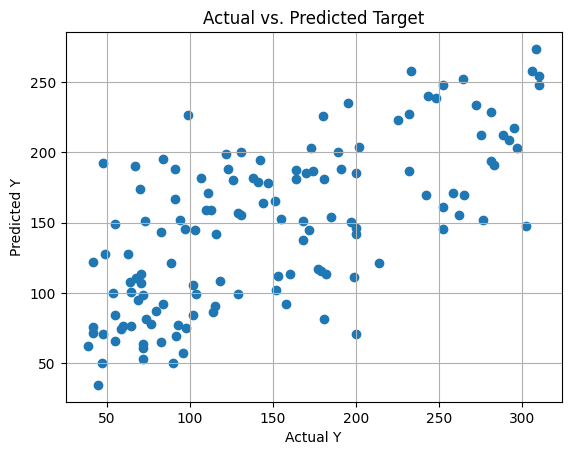

In [624]:
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

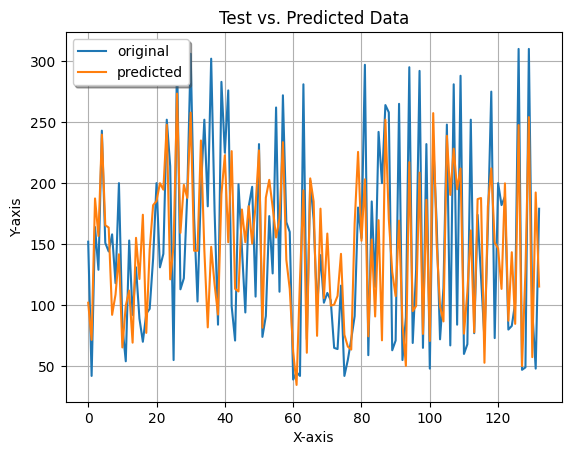

In [625]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lin_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b> SGD Regression: Diabetes Prediction</b>

Let us calculate **R-squared**, **SGD Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [626]:
print("SGD Regression: Diabetes Prediction")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
sgd_score = sgd_reg.score(x_train, y_train)
print("R-squared:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = sgd_mse*(1/2.0)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression: Diabetes Prediction
R-squared: 0.5304555252596939
SGD Regressor Model Accuracy: 46.616534 %

MAE: 45.99114894777505
MSE: 3293.090437839702
RMSE: 1646.545218919851



Let us plot a graph of the **Actual vs. Predicted Target**.

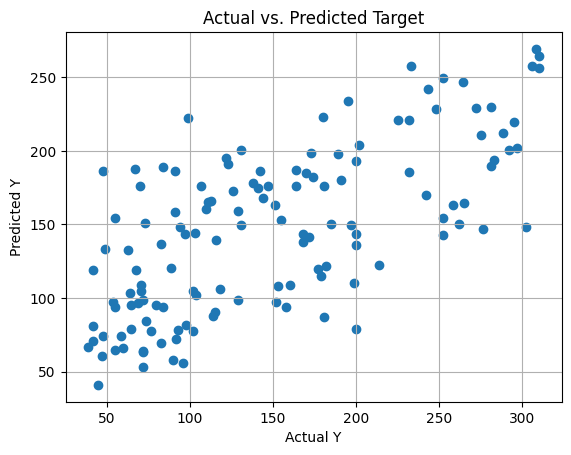

In [627]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

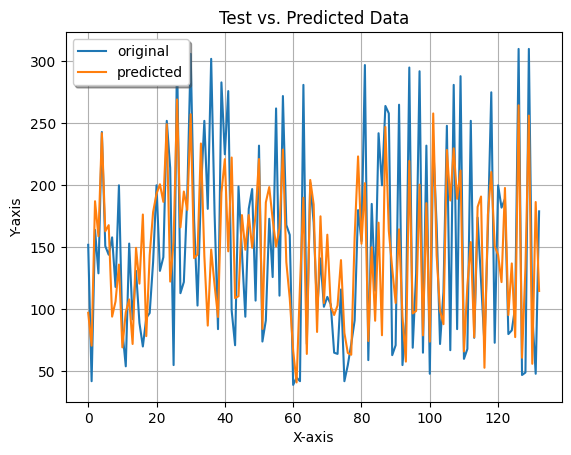

In [628]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, sgd_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b> Model Comparison</b>

**1. Evaluation Matrix Comparison**

In [629]:
#Performing evaluation matrix comparison
model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy (Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_accuracy, lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_accuracy, sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------------+------------+-------------+
|    | Comparison Matrix         | LR Model   | SGD Model   |
|----+---------------------------+------------+-------------|
| 0  | Accuracy (Variance Score) | 46.1959    | 46.6165     |
| 1  | R2 Score                  | 0.535983   | 0.530456    |
| 2  | MAE                       | 46.0725    | 45.9911     |
| 3  | MSE                       | 3315.89    | 3293.09     |
| 4  | RMSE                      | 1657.95    | 1646.55     |
+----+---------------------------+------------+-------------+


**2. Prediction Comparison - A: Scatter Plot**

Let us perform a comparison of the **Actual vs. Predicted Target** for the **Scatter Plot**.

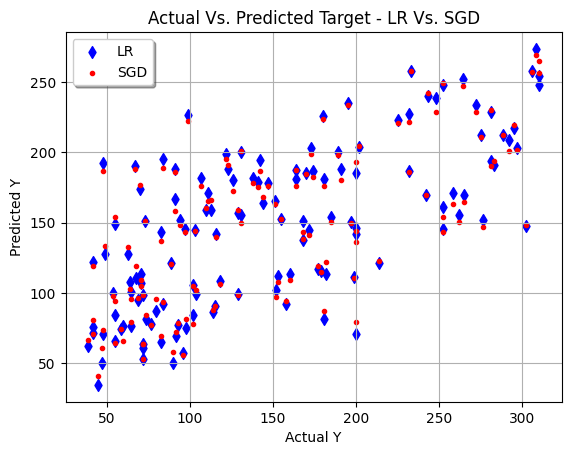

In [630]:
plt.scatter(y_test, lin_y_pred, c="b", marker="d", label='LR')
plt.scatter(y_test, sgd_y_pred, c="r", marker=".", label='SGD')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual Vs. Predicted Target - LR Vs. SGD')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid()
plt.show()

**3. Prediction Comparison - B: Line Graph**

Let us perform a comparison of **LR vs. SGD Prediction** for the **Line Graph**.

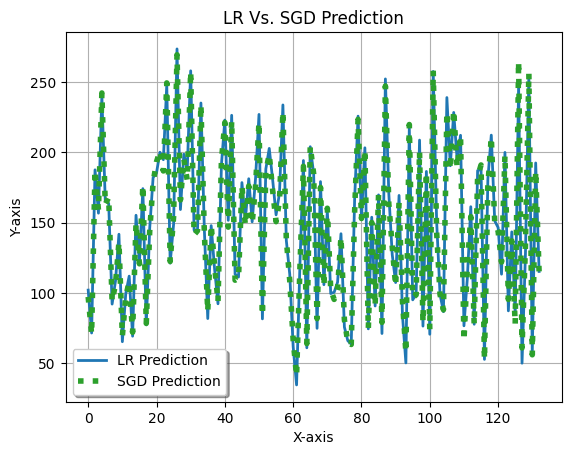

In [631]:
x_ax = range(len(sgd_y_pred))
plt.plot(x_ax, lin_y_pred, c="C0", linestyle="-", linewidth = 2, label="LR Prediction")
plt.plot(x_ax, sgd_y_pred, c="C2", linestyle=":", linewidth = 4, label="SGD Prediction")
plt.title("LR Vs. SGD Prediction")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**4. Prediction Comparison - C: Target Prediction Table**

Let us compare the **LR Predicted value** and **SGD Predicted value**.


In [632]:
prediction_table = pd.DataFrame(columns=["LR Predicted Value", "SGD Predicted Value"])
prediction_table["LR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred

print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+-----+----------------------+-----------------------+
|     | LR Predicted Value   | SGD Predicted Value   |
|-----+----------------------+-----------------------|
| 0   | 101.989              | 97.1646               |
| 1   | 71.515               | 70.6478               |
| 2   | 187.459              | 187.167               |
| 3   | 156.662              | 158.883               |
| 4   | 239.784              | 242.082               |
| 5   | 165.52               | 162.933               |
| 6   | 163.588              | 167.865               |
| 7   | 92.0642              | 94.0908               |
| 8   | 108.669              | 106.329               |
| 9   | 141.694              | 136.055               |
| 10  | 65.3349              | 69.2767               |
| 11  | 99.6239              | 97.6213               |
| 12  | 111.923              | 107.936               |
| 13  | 69.2472              | 72.0083               |
| 14  | 155.176              | 149.559               |
| 15  | 12

**Note: In this topic, we saw the use of the linear regression methods, but in the next topic we will be working on "Logistic Regression".**

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)